In [2]:
%config IPCompleter.greedy=True
!pip install numpy
!pip install datetime
!pip install pandas
!pip install matplotlib
!pip install scipy

# CARNEGIE MELLON UNIVERSITY
**Name**: Junxiao Guo <br/>
**Andrew ID**: junxiaog <br/>
**Course**: DATA, INFERENCE & APPLIED MACHINE LEARNING (COURSE 18-785)<br/>
**ASSIGNMENT 2** <br/>

## Question 1
Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Malnutrition prevalence, weight for age (% of children under 5).”

What kind of relationship do you expect? Make a scatter plot of malnutrition against GDP per capita (using all available years and countries). What kind of relationship do you see? Make a graph for developing regions (six types and use one color for each). Make a graph for income levels (four types and one color for each). Carefully label all graphs and provide legends.# Q1_1

In [3]:
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from scipy.stats import norm

In [4]:
f1 = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284.csv',skiprows=4)
f2 = pd.read_csv('API_SH.STA.MALN.ZS_DS2_en_csv_v2_49604/API_SH.STA.MALN.ZS_DS2_en_csv_v2_49604.csv',skiprows=4)
codeArr = f1['Country Code']
assert list(f1['Country Code']) == list(f2['Country Code']), "Country Code doesn't match"
res = []
idxarr = []
for i in range(len(codeArr)):
    tmplist = list(f1.iloc[i][4:])
    tmplist2 = list(f2.iloc[i][4:])
    for j,k in zip(tmplist,tmplist2):
        if j>0 and k>0:
            idxarr.append(i)
            res.append((j,k))
            
df_regions = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284.csv')
cc = list(df_regions['Country Code'])
reg = list(df_regions['Region'])
icm = list(df_regions['IncomeGroup'])
curr_dict = {}
for i,j,k in zip(cc,reg,icm):
    curr_dict[i] = (j,k)
# print(curr_dict)
regions = {}
income_levels = {}

for i in reg:
    if pd.isna(i) or i=='North America' or i in regions:
        continue
    regions[i] = []
for j in icm:
    if pd.isna(j) or j in income_levels:
        continue
    income_levels[j] = []

curr_residx = 0
for k in (idxarr):
    if codeArr[k] == 'INX':
        curr_residx+=1
        continue
    curr_region = curr_dict[codeArr[k]][0]
    curr_income_level = curr_dict[codeArr[k]][1]
    if not pd.isna(curr_region) and curr_region!='North America':
        regions[curr_region].append(res[curr_residx])
    if not pd.isna(curr_income_level):
        income_levels[curr_income_level].append(res[curr_residx])
    curr_residx+=1



### 1.1 Scatter plot of malnutrition against GDP per capita

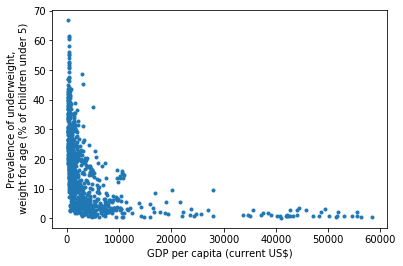

In [5]:
plt.scatter([i[0] for i in res],[i[1] for i in res],marker='.')
plt.ylabel("Prevalence of underweight,\n weight for age (% of children under 5)")
plt.xlabel("GDP per capita (current US\$)")
plt.show()


### 1.2 Graph for developing regions (six types and use one color for each).

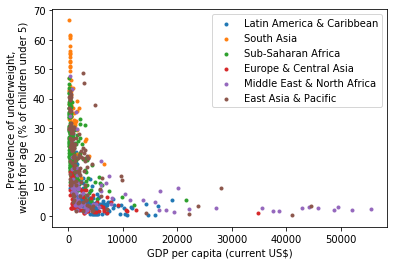

In [6]:
for i in regions.keys():
    plt.scatter([j[0] for j in regions[i]],[j[1] for j in regions[i]],label=i,marker='.')
    
plt.legend()
plt.ylabel("Prevalence of underweight,\n weight for age (% of children under 5)")
plt.xlabel("GDP per capita (current US\$)")
plt.show()

### 1.3 Graph for income levels (four types and one color for each).

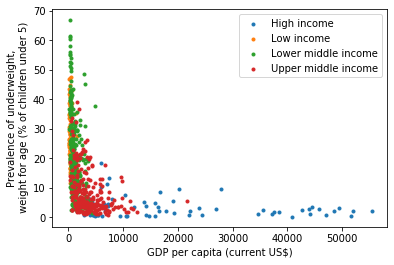

In [7]:
for i in income_levels.keys():
    plt.scatter([j[0] for j in income_levels[i]],[j[1] for j in income_levels[i]],label=i,marker='.')

plt.legend()
plt.ylabel("Prevalence of underweight,\n weight for age (% of children under 5)")
plt.xlabel("GDP per capita (current US\$)")
plt.show()

## Question 2
Using Quandl, download data, synchronize the time stamps and plot time series for the prices of Wheat, Crude Oil and Gold in $ on the same graph. Indicate the maximum and minimum prices in all three time series using coloured dots. Use a legend to explain each one.

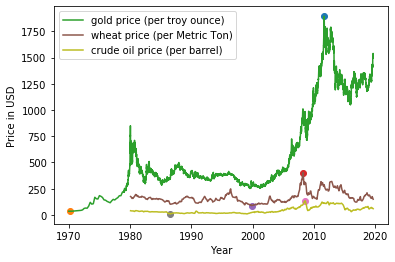

In [8]:
# wheat_csv = pd.read_csv('https://www.quandl.com/api/v3/datasets/ODA/PWHEAMT_USD.csv?api_key=kvoqXcts9yr_E-N-sa_J')
# crude_oil_csv = pd.read_csv('https://www.quandl.com/api/v3/datasets/ODA/POILBRE_USD.csv?api_key=kvoqXcts9yr_E-N-sa_J')
# gold_csv= pd.read_csv('https://www.quandl.com/api/v3/datasets/WGC/GOLD_DAILY_USD.csv?api_key=kvoqXcts9yr_E-N-sa_J',parse_dates=['Date'])
wheat_csv = pd.read_csv('ODA-PWHEAMT_USD.csv')
crude_oil_csv = pd.read_csv('ODA-POILBRE_USD.csv')
gold_csv= pd.read_csv('WGC-GOLD_DAILY_USD.csv')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
def get_plot_info(tablename,item_name,datename,valuename):
    a = pd.to_datetime(tablename[datename],format="%Y-%m-%d")
    b = tablename[valuename]
    n_max = b.idxmax()
    plt.plot(a[n_max],b[n_max],'o')
    n_min = b.idxmin()
    plt.plot(a[n_min],b[n_min],'o')
    plt.plot(a,b,label=item_name)

get_plot_info(gold_csv,'gold price (per troy ounce)','Date','Value')
get_plot_info(wheat_csv,'wheat price (per Metric Ton)','Date','Value')
get_plot_info(crude_oil_csv,'crude oil price (per barrel)','Date','Value')
plt.xlabel("Year")
plt.ylabel("Price in USD")
plt.legend()
plt.show()



# Question 3
Download “CO2 emissions (metric tons per capita)” data from the World Bank Indicators. Select the emissions for all countries in 2010 and calculate summary statistics. Provide a table giving the mean, median, standard deviation, 5, 25, 75, and 95 percentiles.

Repeat the same process for “School enrolment, primary (% net).”

In [9]:
def summary_statistics(filename):
    df = pd.read_csv(filename,skiprows=4).dropna(subset=['2010'])
    countrycode_arr = df['Country Code']
    curr_df = df['2010'].astype(float)
#     maxval = curr_df.max()
#     minval = curr_df.min()
    medianval = curr_df.median()
    stdval = curr_df.std()
    meanval =curr_df.mean()
    pctl_5 = curr_df.quantile(0.05)
    pctl_25 = curr_df.quantile(0.25)
    pctl_75 = curr_df.quantile(0.75)
    pctl_95 = curr_df.quantile(0.95)
    outdf = df = pd.DataFrame(columns=['Mean', 'Median', 'Standard Deviation','5th Percentiles','25th Percentiles'\
                                       ,'75th Percentiles','95th Percentiles'])
    outdf['Mean'] = [meanval]
    outdf['Median'] = [medianval]
    outdf['Standard Deviation'] = [stdval]
    outdf['5th Percentiles'] = pctl_5
    outdf['25th Percentiles'] = pctl_25
    outdf['75th Percentiles'] = pctl_75
    outdf['95th Percentiles'] = pctl_95
    return outdf



### 3.1 Statistics for emissions for all countries in 2010

In [10]:
co2_emission_df = summary_statistics('API_EN.ATM.CO2E.PC_DS2_en_csv_v2_103958/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_103958.csv')
print(co2_emission_df)

       Mean    Median  Standard Deviation  5th Percentiles  25th Percentiles  \
0  4.847677  2.935527            5.858565         0.118104          0.815799   

   75th Percentiles  95th Percentiles  
0          6.642697         15.670273  


| Global data for 2010                            | Mean      | Median    | Standard Deviation | 5th Percentile | 25th Percentile | 75th Percentile | 95th Percentile |
|----------------------------------------|-----------|-----------|--------------------|----------------|-----------------|-----------------|-----------------|
| CO2 emissions (metric tons per capita) | 4.847677  | 2.935527  | 5.858565           | 0.118104       | 0.815799        | 6.642697        | 15.670273       |

### 3.2 Statistics School enrolment, primary (% net) in 2010

In [11]:
school_enroll_df = summary_statistics('API_SE.PRM.NENR_DS2_en_csv_v2_43936/API_SE.PRM.NENR_DS2_en_csv_v2_43936.csv')
print(school_enroll_df)

        Mean     Median  Standard Deviation  5th Percentiles  \
0  89.292969  93.042404           10.376257        69.952073   

   25th Percentiles  75th Percentiles  95th Percentiles  
0         86.622383         96.118248          99.01914  


| Global data for 2010                            | Mean      | Median    | Standard Deviation | 5th Percentile | 25th Percentile | 75th Percentile | 95th Percentile |
|----------------------------------------|-----------|-----------|--------------------|----------------|-----------------|-----------------|-----------------|
| School enrollment, primary (% net)     | 89.292969 | 93.042404 | 10.376257          | 69.952073      | 86.622383       | 96.118248       | 99.01914        |

# Question 4
The World Bank Indicators provide variables called “Fertility rate, total (births per woman)” and “GDP per capita (current US$)”.

Make a scatter plot of Fertility rate versus GDP per capita for all countries in 2010. Produce cumulative distribution functions for the fertility rate variable using data from 1990 and 2010 respectively. Use vertical lines to indicate the mean and median. Use a legend to explain which is the mean and which is the median. Have fertility rates changed over this twenty-year period?

### 4.1 Scatter plot of Fertility rate versus GDP per capita for all countries in 2010.

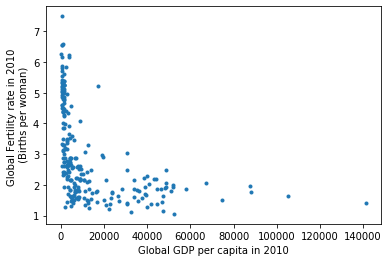

In [12]:
gdp_percap_df = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_129284.csv',skiprows=4)
gdp_percap_df_2010 = gdp_percap_df['2010']
fertility_df = pd.read_csv('API_SP.DYN.TFRT.IN_DS2_en_csv_v2_41035/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_41035.csv',skiprows=4)
fertility_df_2010 = fertility_df['2010']
assert list(gdp_percap_df['Country Code']) == list(fertility_df['Country Code']), "Country code does not match!"
plt.scatter(gdp_percap_df_2010,fertility_df_2010,marker='.')
plt.xlabel("Global GDP per capita in 2010")
plt.ylabel("Global Fertility rate in 2010 \n (Births per woman)")
plt.show()

### 4.2

/Users/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':
/Users/robert/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]


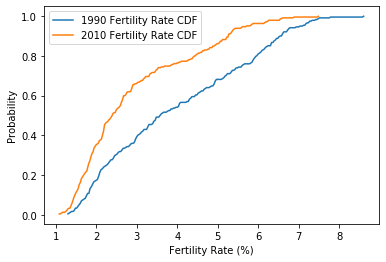

In [15]:
fertility_1990 = fertility_df['1990'].dropna()
fertility_2010 = fertility_df['2010'].dropna()
fertility_1990_median = np.median(fertility_1990)
fertility_1990_mean = np.mean(fertility_1990)
fertility_2010_median = np.median(fertility_2010)
fertility_2010_mean = np.mean(fertility_2010)

num_bins = len(fertility_1990)
counts, bin_edges = np.histogram (fertility_1990, bins=num_bins, normed=True)
num_bins = len(fertility_2010)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],label='1990 Fertility Rate CDF')
counts, bin_edges = np.histogram (fertility_2010, bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1],label='2010 Fertility Rate CDF')
plt.xlabel("Fertility Rate (%)")
plt.ylabel("Probability")
plt.legend()
# plt.plot(fertility_1990_mean,fertility_1990_median,'-ro')

# def ecdf(data):
#     """ Compute ECDF """
#     x = np.sort(data)
#     n = x.size
#     y = np.arange(1, n+1) / n
#     return(x,y)

# x,y = ecdf(fertility_1990)
# plt.scatter(x=x, y=y);



## Question 5
Download the latest data for the “Happy Planet Index” from http://www.happyplanetindex.org for year 2016, and “Corruption Perceptions Index” from https://www.transparency.org/news/feature/corruption_perceptions_index_2016. Both datasets are available as excel spreadsheets. Find matching countries for both indices and make a carefully labelled scatter plot to demonstrate the relationship using ranks in both cases. Are there any countries that stand out as being unusual?

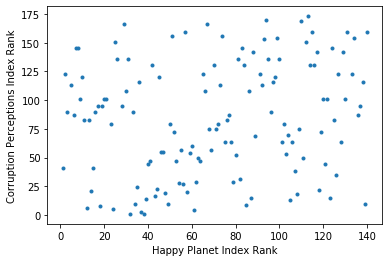

In [14]:
hpidf = pd.read_excel('hpi-data-2016.xlsx', sheet_name='Rank order',skiprows=6)
hpi_rank = hpidf['HPI Rank']
hpi_country = hpidf['Country']
hpi_dict = {}
for i,j in zip(hpi_rank,hpi_country):
    hpi_dict[j] = i

corruptdf = pd.read_excel('CPI2016_FullDataSetWithRegionalTables.xlsx',sheet_name='CPI2016_FINAL_16Jan')
corrupt_rank = corruptdf['Rank']
corrupt_country = corruptdf['Country']
corrupt_dict ={}
for i,j in zip(corrupt_rank,corrupt_country):
    corrupt_dict[j] = i

final_arr = []
for country in hpi_dict.keys():
    if country in corrupt_dict.keys():
        final_arr.append((hpi_dict[country],corrupt_dict[country]))
    elif(country == 'United States of America'):
        final_arr.append((hpi_dict[country],corrupt_rank[17]))
    elif(country == 'South Korea'):
        final_arr.append((hpi_dict[country],corrupt_rank[51]))
plt.scatter([i[0] for i in final_arr],[i[1] for i in final_arr],marker='.')
plt.xlabel('Happy Planet Index Rank')
plt.ylabel('Corruption Perceptions Index Rank')
plt.show()

        